## BCIS 5110 Analysis of JD Data

In [103]:
# This code appears in every demonstration Notebook.
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### We will analyze JD Data in the rest of our assignments.
The objective: to build models to accurately predict delivery times for customer orders.<br>
The data: We need the following tables from the JD.com data<br>
        1. Order<br>
        2. User<br>
        3. Delivery<br>
        4. Inventory<br>
        5. Network<br>        

#### Assignment 8 include Q1 - Q10.

1. Import necessary packages.

In [104]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

2. Read in the five csv files.

In [105]:
order_df=pd.read_csv(r"C:\Assignments\BA\BAASSIGN\order.csv")
user_df = pd.read_csv(r"C:\Assignments\BA\BAASSIGN\user.csv")
delivery_df = pd.read_csv(r"C:\Assignments\BA\BAASSIGN\delivery.csv")
inventory_df = pd.read_csv(r"C:\Assignments\BA\BAASSIGN\inventory.csv")
network_df = pd.read_csv(r"C:\Assignments\BA\BAASSIGN\network.csv")

3. Display a sample of each data frame. How many observations? How many columns? What are the column names? (Use code to display such information.)

In [106]:
print('Order DataFrame:')
display(order_df.head())

num_rows = order_df.shape[0]
num_cols = order_df.shape[1]
col_names = order_df.columns.tolist()

print(f"Number of observations: {num_rows}")
print(f"Number of columns: {num_cols}")
print("Column names:")
print(col_names)
print("\n")

Order DataFrame:


,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type,promise,original_unit_price,final_unit_price,direct_discount_per_unit,quantity_discount_per_unit,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des
0,d0cf5cc6db,0abe9ef2ce,581d5b54c1,2018-03-01,2018-03-01 17:14:25.0,1,2,-,89.0,79.0,0.0,10.0,0.0,0.0,0,4,28
1,7444318d01,33a9e56257,067b673f2b,2018-03-01,2018-03-01 11:10:40.0,1,1,2,99.9,53.9,5.0,41.0,0.0,0.0,0,28,28
2,f973b01694,4ea3cf408f,623d0a582a,2018-03-01,2018-03-01 09:13:26.0,1,1,2,78.0,58.5,19.5,0.0,0.0,0.0,0,28,28
3,8c1cec8d4b,b87cb736cb,fc5289b139,2018-03-01,2018-03-01 21:29:50.0,1,1,2,61.0,35.0,0.0,26.0,0.0,0.0,0,4,28
4,d43a33c38a,4829223b6f,623d0a582a,2018-03-01,2018-03-01 19:13:37.0,1,1,1,78.0,53.0,19.0,0.0,0.0,6.0,0,3,16


Number of observations: 549989
Number of columns: 17
Column names:
['order_ID', 'user_ID', 'sku_ID', 'order_date', 'order_time', 'quantity', 'type', 'promise', 'original_unit_price', 'final_unit_price', 'direct_discount_per_unit', 'quantity_discount_per_unit', 'bundle_discount_per_unit', 'coupon_discount_per_unit', 'gift_item', 'dc_ori', 'dc_des']




In [107]:
print('User DataFrame:')
display(user_df.head())

num_rows = user_df.shape[0]
num_cols = user_df.shape[1]
col_names = user_df.columns.tolist()

print(f"Number of observations: {num_rows}")
print(f"Number of columns: {num_cols}")
print("Column names:")
print(col_names)
print("\n")

User DataFrame:


,user_ID,user_level,first_order_month,plus,gender,age,marital_status,education,city_level,purchase_power
0,000089d6a6,1,2017-08,0,F,26-35,S,3,4,3
1,0000babd1f,1,2018-03,0,U,U,U,-1,-1,-1
2,0000bc018b,3,2016-06,0,F,>=56,M,3,2,3
3,0000d0e5ab,3,2014-06,0,M,26-35,M,3,2,2
4,0000dce472,3,2012-08,1,U,U,U,-1,-1,-1


Number of observations: 457298
Number of columns: 10
Column names:
['user_ID', 'user_level', 'first_order_month', 'plus', 'gender', 'age', 'marital_status', 'education', 'city_level', 'purchase_power']




In [108]:
print('Delivery DataFrame:')
display(delivery_df.head())

num_rows = delivery_df.shape[0]
num_cols = delivery_df.shape[1]
col_names = delivery_df.columns.tolist()

print(f"Number of observations: {num_rows}")
print(f"Number of columns: {num_cols}")
print("Column names:")
print(col_names)
print("\n")

Delivery DataFrame:


,package_ID,order_ID,type,ship_out_time,arr_station_time,arr_time
0,dc3d6d2258,dc3d6d2258,1,2018-03-01 08:00:00,2018-03-01 15:00:00,2018-03-01 18:00:00
1,19802a570c,19802a570c,1,2018-03-01 10:00:00,2018-03-01 15:00:00,2018-03-01 17:00:00
2,e22627af66,e22627af66,1,2018-03-01 11:00:00,2018-03-01 15:00:00,2018-03-01 17:00:00
3,50d11a586d,50d11a586d,1,2018-03-01 10:00:00,2018-03-01 16:00:00,2018-03-01 19:00:00
4,a3bfe38bf4,a3bfe38bf4,1,2018-03-01 11:00:00,2018-03-01 16:00:00,2018-03-01 17:00:00


Number of observations: 293229
Number of columns: 6
Column names:
['package_ID', 'order_ID', 'type', 'ship_out_time', 'arr_station_time', 'arr_time']




In [109]:
print('Inventory DataFrame:')
display(inventory_df.head())

num_rows = inventory_df.shape[0]
num_cols = inventory_df.shape[1]
col_names = inventory_df.columns.tolist()

print(f"Number of observations: {num_rows}")
print(f"Number of columns: {num_cols}")
print("Column names:")
print(col_names)
print("\n")

Inventory DataFrame:


,dc_ID,sku_ID,date
0,9,50f6f91962,2018-03-01
1,9,7f0ddbcdde,2018-03-01
2,9,8ad5789d74,2018-03-01
3,9,468d34eda4,2018-03-01
4,9,460afaddb6,2018-03-01


Number of observations: 136079
Number of columns: 3
Column names:
['dc_ID', 'sku_ID', 'date']




In [110]:
print('Network DataFrame:')
display(network_df.head())

num_rows = network_df.shape[0]
num_cols = network_df.shape[1]
col_names = network_df.columns.tolist()

print(f"Number of observations: {num_rows}")
print(f"Number of columns: {num_cols}")
print("Column names:")
print(col_names)
print("\n")

Network DataFrame:


,region_ID,dc_ID
0,2,57
1,2,43
2,2,42
3,2,66
4,2,20


Number of observations: 56
Number of columns: 2
Column names:
['region_ID', 'dc_ID']




4. Check for missing values of columns of each dataframe. You can use sum() (instead of any()) to find out the number of missing values. Which variables have missing values?

In [111]:
dataframes = {
    "Order": order_df,
    "User": user_df,
    "Delivery": delivery_df,
    "Inventory": inventory_df,
    "Network": network_df
}
for name, df in dataframes.items():
    missing_values = df.isna().sum()
    print(f"Missing values in the {name} dataframe:")
    print(missing_values)
    
    total_missing = missing_values.sum()
    if total_missing == 0:
        print(f"No missing values in the {name} dataframe")
    else:
        print(f"Total missing values in the {name} dataframe: {total_missing}")
    print()

Missing values in the Order dataframe:
order_ID                      0
user_ID                       0
sku_ID                        0
order_date                    0
order_time                    0
quantity                      0
type                          0
promise                       0
original_unit_price           0
final_unit_price              0
direct_discount_per_unit      0
quantity_discount_per_unit    0
bundle_discount_per_unit      0
coupon_discount_per_unit      0
gift_item                     0
dc_ori                        0
dc_des                        0
dtype: int64
No missing values in the Order dataframe

Missing values in the User dataframe:
user_ID              0
user_level           0
first_order_month    0
plus                 0
gender               0
age                  0
marital_status       0
education            0
city_level           0
purchase_power       0
dtype: int64
No missing values in the User dataframe

Missing values in the Delivery dataframe

5. Check the promise variable in orders table. What unusual values do you notice? What do you think it means?

In [112]:
data = order_df
unique_promise_values = data['promise'].unique()
print("Unique 'promise' values:")
print(unique_promise_values)
#The '-' character is an unusual value, usually suggesting the absence or lack of defined data in this field.
#It is frequently employed as a placeholder when data is unavailable or irrelevant.

Unique 'promise' values:
['-' '2' '1' '3' '4' '5' '6' '7' '8']


6. How many observations for each value in 'promise' variable? What information can you draw from this?

In [113]:
promise_value_counts = data['promise'].value_counts()
print("Observations for each value in 'promise' variable:")
print(promise_value_counts)

# The 'promise' variable in the dataset has the following count of observations for each value:

# '-' : 208,583 occurrences
# 1 : 157,509 occurrences
# 2 : 109,990 occurrences
# 3 : 33,176 occurrences
# 4 : 23,882 occurrences
# 5 : 10,054 occurrences
# 6 : 3,039 occurrences
# 7 : 1,382 occurrences
# 8 : 2,374 occurrences

#In the 'promise' field, the most frequently appearing value is "-", with 208,583 occurrences, indicating potential missing or unclear data.
#Values 1, 2, and 3 have relatively high counts, with 157,509, 109,990, and 33,176 observations, respectively, likely corresponding to different levels or categories of pledges or obligations.
#Values 4, 5, 6, 7, and 8 have lower numbers, with values 4 and 5 having some but fewer observations. These values possibly represent less common promise levels or categories.
#To gain more detailed insights from the data, it's crucial to understand the context and significance of these promise values.
#Depending on the objectives, the distribution of promise values may impact the analysis or decision-making process.

Observations for each value in 'promise' variable:
-    208583
1    157509
2    109990
3     33176
4     23882
5     10054
6      3039
8      2374
7      1382
Name: promise, dtype: int64


7. Select only two variables: 'type' and 'promise' from order table. Sort it by variable 'type' in descending order. What do you observe from the results? (check the first 10 and last 10 observations.) Think about the meaning of the type variable.

In [114]:
df = order_df[['type', 'promise']]
df = df.sort_values(by='type', ascending=False)
print("First 10 observations:")
display(df.head(10))
print("\nLast 10 observations:")
display(df.tail(10))
#The 'type' variable categorizes from 2 to 1, with 2 as the highest. 'promise' indicates commitments, with values '-' and numbers like '1' and '2'. 
#'type' may be a top-level category, and 'promise' might relate to delivery or commitments.

First 10 observations:


,type,promise
0,2,-
308329,2,-
308358,2,-
308357,2,-
308356,2,-
308355,2,-
308354,2,-
308353,2,-
308352,2,-
308351,2,-



Last 10 observations:


,type,promise
334636,1,1
334633,1,1
334626,1,1
334632,1,1
334631,1,1
116820,1,2
116821,1,2
116822,1,1
334627,1,1
274994,1,2


8. Merge order and delivery tables, using inner merge. What does inner merge mean? How many observations are there in the merged dataset? Compared with the number of observations in the original order and delivery table, what can you say about the match between orders and deliveries?

In [115]:
Inner_merged_data = pd.merge(order_df, delivery_df, on='order_ID', how='inner')
display(Inner_merged_data)
observations_merged = Inner_merged_data.shape[0]

observations_order = order_df.shape[0]
observations_delivery = delivery_df.shape[0]

print(f"Number of observations in the merged dataset: {observations_merged}")
print(f"Number of observations in the 'order' table: {observations_order}")
print(f"Number of observations in the 'delivery' table: {observations_delivery}")

if observations_merged == min(observations_order, observations_delivery):
    print("All orders have corresponding deliveries, and all deliveries have corresponding orders.")
else:
    print("Some orders do not have corresponding deliveries, or some deliveries do not have corresponding orders.")
#An inner merge (or inner join) combines rows from both dataframes only when there's a matching value in the specified key column.
#The resulting merged dataset, 'Inner_merged_df,' contains 326,880 rows.

,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type_x,promise,original_unit_price,final_unit_price,...,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des,package_ID,type_y,ship_out_time,arr_station_time,arr_time
0,7444318d01,33a9e56257,067b673f2b,2018-03-01,2018-03-01 11:10:40.0,1,1,2,99.9,53.9,...,0.0,0.0,0,28,28,7444318d01,1,2018-03-01 13:00:00,2018-03-02 08:00:00,2018-03-02 14:00:00
1,f973b01694,4ea3cf408f,623d0a582a,2018-03-01,2018-03-01 09:13:26.0,1,1,2,78.0,58.5,...,0.0,0.0,0,28,28,f973b01694,1,2018-03-01 14:00:00,2018-03-02 09:00:00,2018-03-02 13:00:00
2,8c1cec8d4b,b87cb736cb,fc5289b139,2018-03-01,2018-03-01 21:29:50.0,1,1,2,61.0,35.0,...,0.0,0.0,0,4,28,8c1cec8d4b,1,2018-03-02 09:00:00,2018-03-03 08:00:00,2018-03-04 11:00:00
3,d43a33c38a,4829223b6f,623d0a582a,2018-03-01,2018-03-01 19:13:37.0,1,1,1,78.0,53.0,...,0.0,6.0,0,3,16,d43a33c38a,1,2018-03-01 20:00:00,2018-03-02 07:00:00,2018-03-02 11:00:00
4,e0f5386d87,0b07cae293,589c2b865b,2018-03-01,2018-03-01 21:09:15.0,1,1,1,79.9,38.9,...,0.0,0.0,0,3,16,e0f5386d87,1,2018-03-01 22:00:00,2018-03-02 09:00:00,2018-03-02 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326857,5fd298d448,165ee3e319,f7280c119d,2018-03-31,2018-03-31 12:42:35.0,1,2,3,269.0,189.0,...,0.0,0.0,0,2,2,1b81523e8d,0,2018-03-31 13:00:00,2018-04-02 07:00:00,2018-04-02 13:00:00
326858,9fa0694b3b,39933e9bc6,767ac490ed,2018-03-31,2018-03-31 19:51:43.0,1,1,2,0.0,-1.0,...,0.0,0.0,1,2,2,9fa0694b3b,1,2018-03-31 21:00:00,2018-04-01 07:00:00,2018-04-01 10:00:00
326859,c9d77a7ed0,18f92434cd,7f53769d3f,2018-03-31,2018-03-31 08:55:57.0,1,1,3,118.0,55.0,...,0.0,0.0,0,59,2,c9d77a7ed0,1,2018-03-31 11:00:00,2018-04-02 07:00:00,2018-04-02 15:00:00
326860,b9ad79338f,b5caf8a580,8dc4a01dec,2018-03-31,2018-03-31 13:31:01.0,1,1,2,78.0,78.0,...,0.0,0.0,0,2,2,b9ad79338f,1,2018-03-31 14:00:00,2018-04-01 07:00:00,2018-04-01 11:00:00


Number of observations in the merged dataset: 326862
Number of observations in the 'order' table: 549989
Number of observations in the 'delivery' table: 293229
Some orders do not have corresponding deliveries, or some deliveries do not have corresponding orders.


9. Merge order and delivery tables, using right merge. What does right merge mean? How many obervations are there in the merged dataset? Do all delivery records have matched order information?

In [116]:
Right_merged_data = pd.merge(order_df, delivery_df, on='order_ID', how='right')
display(Right_merged_data)
observations_merged = Right_merged_data.shape[0]

# Check if all delivery records have matched order information
all_delivery_matched = Right_merged_data['order_ID'].notnull().all()

print(f"Number of observations in the merged dataset: {observations_merged}")
print(f"Do all delivery records have matched order information: {all_delivery_matched}")
#A right merge combines two DataFrames based on a common column or columns, but it includes all of the rows from the right DataFrame, even if there is no matching row in the left DataFrame.
#The resulting merged dataset, 'Right_merged_df,' contains 326,880 rows.

,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type_x,promise,original_unit_price,final_unit_price,...,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des,package_ID,type_y,ship_out_time,arr_station_time,arr_time
0,dc3d6d2258,ee666e25c3,2e06817802,2018-03-01,2018-03-01 06:21:07.0,1,1,1,36.0,33.000000,...,0.0,3.000000,0,4,4,dc3d6d2258,1,2018-03-01 08:00:00,2018-03-01 15:00:00,2018-03-01 18:00:00
1,19802a570c,845df5b5f2,5ae1bb1c76,2018-03-01,2018-03-01 09:10:09.0,1,1,1,78.0,59.000000,...,0.0,0.000000,0,2,2,19802a570c,1,2018-03-01 10:00:00,2018-03-01 15:00:00,2018-03-01 17:00:00
2,e22627af66,cae0d8c01f,b8c182c74f,2018-03-01,2018-03-01 10:50:41.0,1,1,1,230.0,188.000000,...,0.0,42.000000,0,5,5,e22627af66,1,2018-03-01 11:00:00,2018-03-01 15:00:00,2018-03-01 17:00:00
3,e22627af66,cae0d8c01f,c98d32ff09,2018-03-01,2018-03-01 10:50:41.0,3,1,1,0.0,0.000000,...,0.0,0.000000,1,5,5,e22627af66,1,2018-03-01 11:00:00,2018-03-01 15:00:00,2018-03-01 17:00:00
4,e22627af66,cae0d8c01f,c98d32ff09,2018-03-01,2018-03-01 10:50:41.0,3,1,1,0.0,-0.333333,...,0.0,0.333333,1,5,5,e22627af66,1,2018-03-01 11:00:00,2018-03-01 15:00:00,2018-03-01 17:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326857,cb319102f1,df8c108eff,ac0cd64708,2018-03-31,2018-03-31 23:38:17.0,2,1,6,69.9,44.900000,...,0.0,0.000000,0,24,41,cb319102f1,1,2018-04-01 10:00:00,2018-04-07 11:00:00,2018-04-07 15:00:00
326858,0fe3bbcfd8,b1fa95ae5e,068f4481b3,2018-03-22,2018-03-22 17:42:37.0,1,1,8,298.0,232.000000,...,66.0,0.000000,0,41,41,0fe3bbcfd8,1,2018-03-31 13:00:00,2018-04-04 22:00:00,2018-04-07 11:00:00
326859,0fe3bbcfd8,b1fa95ae5e,fbce41fd82,2018-03-22,2018-03-22 17:42:37.0,1,1,8,178.0,158.000000,...,20.0,0.000000,0,41,41,0fe3bbcfd8,1,2018-03-31 13:00:00,2018-04-04 22:00:00,2018-04-07 11:00:00
326860,0fe3bbcfd8,b1fa95ae5e,8dc4a01dec,2018-03-22,2018-03-22 17:42:37.0,2,1,8,78.0,54.500000,...,13.5,10.000000,0,41,41,0fe3bbcfd8,1,2018-03-31 13:00:00,2018-04-04 22:00:00,2018-04-07 11:00:00


Number of observations in the merged dataset: 326862
Do all delivery records have matched order information: True


10. Merge order and delivery tables, using left merge. What does left merge mean? How many obervations are there in the merged dataset? Compare the number of observations of the merged table with the original order table, what can you say about the match between orders and deliveries?

In [117]:
Left_merged_data = pd.merge(order_df, delivery_df, on='order_ID', how='left')
display(Left_merged_data)
observations_merged = Left_merged_data.shape[0]
print(f"Number of observations in the merged dataset: {observations_merged}")
observations_order = order_df.shape[0]
if observations_merged == observations_order:
    print("All orders have corresponding delivery information.")
else:
    print("Some orders do not have corresponding delivery information.")
#A left merge combines two DataFrames based on a common column or columns, but it includes all of the rows from the left DataFrame, even if there is no matching row in the right DataFrame.
##The resulting merged dataset, 'Left_merged_df,' contains 550,027 rows.

,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type_x,promise,original_unit_price,final_unit_price,...,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des,package_ID,type_y,ship_out_time,arr_station_time,arr_time
0,d0cf5cc6db,0abe9ef2ce,581d5b54c1,2018-03-01,2018-03-01 17:14:25.0,1,2,-,89.0,79.0,...,0.0,0.0,0,4,28,NaN,NaN,NaN,NaN,NaN
1,7444318d01,33a9e56257,067b673f2b,2018-03-01,2018-03-01 11:10:40.0,1,1,2,99.9,53.9,...,0.0,0.0,0,28,28,7444318d01,1.0,2018-03-01 13:00:00,2018-03-02 08:00:00,2018-03-02 14:00:00
2,f973b01694,4ea3cf408f,623d0a582a,2018-03-01,2018-03-01 09:13:26.0,1,1,2,78.0,58.5,...,0.0,0.0,0,28,28,f973b01694,1.0,2018-03-01 14:00:00,2018-03-02 09:00:00,2018-03-02 13:00:00
3,8c1cec8d4b,b87cb736cb,fc5289b139,2018-03-01,2018-03-01 21:29:50.0,1,1,2,61.0,35.0,...,0.0,0.0,0,4,28,8c1cec8d4b,1.0,2018-03-02 09:00:00,2018-03-03 08:00:00,2018-03-04 11:00:00
4,d43a33c38a,4829223b6f,623d0a582a,2018-03-01,2018-03-01 19:13:37.0,1,1,1,78.0,53.0,...,0.0,6.0,0,3,16,d43a33c38a,1.0,2018-03-01 20:00:00,2018-03-02 07:00:00,2018-03-02 11:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550012,3ad06b9fbe,a27b3ed4d4,a9109972d1,2018-03-31,2018-03-31 01:22:47.0,1,2,-,0.0,-1.0,...,0.0,1.0,1,2,2,NaN,NaN,NaN,NaN,NaN
550013,c9d77a7ed0,18f92434cd,7f53769d3f,2018-03-31,2018-03-31 08:55:57.0,1,1,3,118.0,55.0,...,0.0,0.0,0,59,2,c9d77a7ed0,1.0,2018-03-31 11:00:00,2018-04-02 07:00:00,2018-04-02 15:00:00
550014,b9ad79338f,b5caf8a580,8dc4a01dec,2018-03-31,2018-03-31 13:31:01.0,1,1,2,78.0,78.0,...,0.0,0.0,0,2,2,b9ad79338f,1.0,2018-03-31 14:00:00,2018-04-01 07:00:00,2018-04-01 11:00:00
550015,be3a9414b1,20ba6655f3,2dd6b818ec,2018-03-31,2018-03-31 12:51:18.0,1,2,-,189.0,78.0,...,0.0,0.0,0,4,28,NaN,NaN,NaN,NaN,NaN


Number of observations in the merged dataset: 550017
Some orders do not have corresponding delivery information.


### Assignment 9 starts here. Q11 - Q20.

In this part, we prepare the data for analysis.

11. First, we need to clean the merged order and delivery table.<br>
Identify the table from the inner merge in Q8. Take a look at it. You may find there are two variables: type_x and type_y, which were not in the original two tables.<br>
The reason is that there is a type variable in both orders and delivery tables. The merge keeps both and assigned x and y suffix to them.<br>
Check the meaning of the two variables in our data description.<br>
To make the two variables consistent, we can replace the values of one variable to match the other.

In [118]:
#Resulting merged DataFrame, named Inner_merged_data, contains columns from both the "order" and "delivery" tables where the "order_ID" values match.
# Replace values of type_y with corresponding values from type_x
Inner_merged_data['type_y'] = Inner_merged_data['type_x']

# Compare values of type_x and type_y
same_values = Inner_merged_data['type_x'] == Inner_merged_data['type_y']
print("Number of observations in the merged dataset:", len(Inner_merged_data))

display(Inner_merged_data.head())

Number of observations in the merged dataset: 326862


,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type_x,promise,original_unit_price,final_unit_price,...,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des,package_ID,type_y,ship_out_time,arr_station_time,arr_time
0,7444318d01,33a9e56257,067b673f2b,2018-03-01,2018-03-01 11:10:40.0,1,1,2,99.9,53.9,...,0.0,0.0,0,28,28,7444318d01,1,2018-03-01 13:00:00,2018-03-02 08:00:00,2018-03-02 14:00:00
1,f973b01694,4ea3cf408f,623d0a582a,2018-03-01,2018-03-01 09:13:26.0,1,1,2,78.0,58.5,...,0.0,0.0,0,28,28,f973b01694,1,2018-03-01 14:00:00,2018-03-02 09:00:00,2018-03-02 13:00:00
2,8c1cec8d4b,b87cb736cb,fc5289b139,2018-03-01,2018-03-01 21:29:50.0,1,1,2,61.0,35.0,...,0.0,0.0,0,4,28,8c1cec8d4b,1,2018-03-02 09:00:00,2018-03-03 08:00:00,2018-03-04 11:00:00
3,d43a33c38a,4829223b6f,623d0a582a,2018-03-01,2018-03-01 19:13:37.0,1,1,1,78.0,53.0,...,0.0,6.0,0,3,16,d43a33c38a,1,2018-03-01 20:00:00,2018-03-02 07:00:00,2018-03-02 11:00:00
4,e0f5386d87,0b07cae293,589c2b865b,2018-03-01,2018-03-01 21:09:15.0,1,1,1,79.9,38.9,...,0.0,0.0,0,3,16,e0f5386d87,1,2018-03-01 22:00:00,2018-03-02 09:00:00,2018-03-02 12:00:00


Then compare the values of the two variables are the same.

In [119]:
# Check if all values are same
if same_values.all():
    print("Values are same.")
else:
    print("Values are not same")

Values are same.


If they are, please drop one of them.

In [120]:
#Check if values in 'type_x' and 'type_y' are the same
values_match = Inner_merged_data['type_x'].equals(Inner_merged_data['type_y'])

#If values are the same, drop one of the columns
if values_match:
    Inner_merged_data.drop(columns=['type_y'], inplace=True)
#Rename 'type_x' to a more meaningful name if needed
   

#Print the updated DataFrame
display(Inner_merged_data.head())

,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type_x,promise,original_unit_price,final_unit_price,...,quantity_discount_per_unit,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des,package_ID,ship_out_time,arr_station_time,arr_time
0,7444318d01,33a9e56257,067b673f2b,2018-03-01,2018-03-01 11:10:40.0,1,1,2,99.9,53.9,...,41.0,0.0,0.0,0,28,28,7444318d01,2018-03-01 13:00:00,2018-03-02 08:00:00,2018-03-02 14:00:00
1,f973b01694,4ea3cf408f,623d0a582a,2018-03-01,2018-03-01 09:13:26.0,1,1,2,78.0,58.5,...,0.0,0.0,0.0,0,28,28,f973b01694,2018-03-01 14:00:00,2018-03-02 09:00:00,2018-03-02 13:00:00
2,8c1cec8d4b,b87cb736cb,fc5289b139,2018-03-01,2018-03-01 21:29:50.0,1,1,2,61.0,35.0,...,26.0,0.0,0.0,0,4,28,8c1cec8d4b,2018-03-02 09:00:00,2018-03-03 08:00:00,2018-03-04 11:00:00
3,d43a33c38a,4829223b6f,623d0a582a,2018-03-01,2018-03-01 19:13:37.0,1,1,1,78.0,53.0,...,0.0,0.0,6.0,0,3,16,d43a33c38a,2018-03-01 20:00:00,2018-03-02 07:00:00,2018-03-02 11:00:00
4,e0f5386d87,0b07cae293,589c2b865b,2018-03-01,2018-03-01 21:09:15.0,1,1,1,79.9,38.9,...,37.0,0.0,0.0,0,3,16,e0f5386d87,2018-03-01 22:00:00,2018-03-02 09:00:00,2018-03-02 12:00:00


12. We need to remove the orders that <br>
1) has a single item; <br>
2) the item is a gift item;<br>

The reason is that those orders might have come from other product categories and only use products from current category as a gift. We do not have information about those orders.

We first find orders with order_ID only appears once in the data, which indicates this order contains a single item.<br>
Hint: you may use .duplicated() method to mark that. Think about which value of the argument 'keep' you want to choose. Consider saving the outcome as a variable.

In [121]:
# Mark orders with a single item as duplicates
single_item_orders = Inner_merged_data.duplicated(subset='order_ID', keep=False)

# Print the first 5 rows of the variable indicating single-item orders
display(single_item_orders)

# Filter orders based on conditions (single item and not a gift item)
filtered_orders = Inner_merged_data[~(single_item_orders & (Inner_merged_data['gift_item'] == 1))]

# Print the first 5 rows of the filtered DataFrame
display(filtered_orders)

0         False
1         False
2         False
3         False
4         False
          ...  
326857    False
326858    False
326859    False
326860    False
326861    False
Length: 326862, dtype: bool

,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type_x,promise,original_unit_price,final_unit_price,...,quantity_discount_per_unit,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des,package_ID,ship_out_time,arr_station_time,arr_time
0,7444318d01,33a9e56257,067b673f2b,2018-03-01,2018-03-01 11:10:40.0,1,1,2,99.9,53.9,...,41.0,0.0,0.0,0,28,28,7444318d01,2018-03-01 13:00:00,2018-03-02 08:00:00,2018-03-02 14:00:00
1,f973b01694,4ea3cf408f,623d0a582a,2018-03-01,2018-03-01 09:13:26.0,1,1,2,78.0,58.5,...,0.0,0.0,0.0,0,28,28,f973b01694,2018-03-01 14:00:00,2018-03-02 09:00:00,2018-03-02 13:00:00
2,8c1cec8d4b,b87cb736cb,fc5289b139,2018-03-01,2018-03-01 21:29:50.0,1,1,2,61.0,35.0,...,26.0,0.0,0.0,0,4,28,8c1cec8d4b,2018-03-02 09:00:00,2018-03-03 08:00:00,2018-03-04 11:00:00
3,d43a33c38a,4829223b6f,623d0a582a,2018-03-01,2018-03-01 19:13:37.0,1,1,1,78.0,53.0,...,0.0,0.0,6.0,0,3,16,d43a33c38a,2018-03-01 20:00:00,2018-03-02 07:00:00,2018-03-02 11:00:00
4,e0f5386d87,0b07cae293,589c2b865b,2018-03-01,2018-03-01 21:09:15.0,1,1,1,79.9,38.9,...,37.0,0.0,0.0,0,3,16,e0f5386d87,2018-03-01 22:00:00,2018-03-02 09:00:00,2018-03-02 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326857,5fd298d448,165ee3e319,f7280c119d,2018-03-31,2018-03-31 12:42:35.0,1,2,3,269.0,189.0,...,0.0,0.0,0.0,0,2,2,1b81523e8d,2018-03-31 13:00:00,2018-04-02 07:00:00,2018-04-02 13:00:00
326858,9fa0694b3b,39933e9bc6,767ac490ed,2018-03-31,2018-03-31 19:51:43.0,1,1,2,0.0,-1.0,...,1.0,0.0,0.0,1,2,2,9fa0694b3b,2018-03-31 21:00:00,2018-04-01 07:00:00,2018-04-01 10:00:00
326859,c9d77a7ed0,18f92434cd,7f53769d3f,2018-03-31,2018-03-31 08:55:57.0,1,1,3,118.0,55.0,...,0.0,0.0,0.0,0,59,2,c9d77a7ed0,2018-03-31 11:00:00,2018-04-02 07:00:00,2018-04-02 15:00:00
326860,b9ad79338f,b5caf8a580,8dc4a01dec,2018-03-31,2018-03-31 13:31:01.0,1,1,2,78.0,78.0,...,0.0,0.0,0.0,0,2,2,b9ad79338f,2018-03-31 14:00:00,2018-04-01 07:00:00,2018-04-01 11:00:00


Then we filter the data to remove those orders of a single gift item. Save the changes.

In [122]:
# Filter orders to remove those with a single gift item
filtered_orders = Inner_merged_data[~(single_item_orders & (Inner_merged_data['gift_item'] == 1))]

# Save the changes to the DataFrame
Inner_merged_data = filtered_orders.copy()

# Print the first 5 rows of the updated DataFrame
display(Inner_merged_data.head())

,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type_x,promise,original_unit_price,final_unit_price,...,quantity_discount_per_unit,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des,package_ID,ship_out_time,arr_station_time,arr_time
0,7444318d01,33a9e56257,067b673f2b,2018-03-01,2018-03-01 11:10:40.0,1,1,2,99.9,53.9,...,41.0,0.0,0.0,0,28,28,7444318d01,2018-03-01 13:00:00,2018-03-02 08:00:00,2018-03-02 14:00:00
1,f973b01694,4ea3cf408f,623d0a582a,2018-03-01,2018-03-01 09:13:26.0,1,1,2,78.0,58.5,...,0.0,0.0,0.0,0,28,28,f973b01694,2018-03-01 14:00:00,2018-03-02 09:00:00,2018-03-02 13:00:00
2,8c1cec8d4b,b87cb736cb,fc5289b139,2018-03-01,2018-03-01 21:29:50.0,1,1,2,61.0,35.0,...,26.0,0.0,0.0,0,4,28,8c1cec8d4b,2018-03-02 09:00:00,2018-03-03 08:00:00,2018-03-04 11:00:00
3,d43a33c38a,4829223b6f,623d0a582a,2018-03-01,2018-03-01 19:13:37.0,1,1,1,78.0,53.0,...,0.0,0.0,6.0,0,3,16,d43a33c38a,2018-03-01 20:00:00,2018-03-02 07:00:00,2018-03-02 11:00:00
4,e0f5386d87,0b07cae293,589c2b865b,2018-03-01,2018-03-01 21:09:15.0,1,1,1,79.9,38.9,...,37.0,0.0,0.0,0,3,16,e0f5386d87,2018-03-01 22:00:00,2018-03-02 09:00:00,2018-03-02 12:00:00


13. Next, we remove orders with multiple packages. Hint: You may groupby order_ID, find the number of unique package_ID ('nunique') and then use transform() to broadcast the value to all record. Save the results as a new variable. Use the variable value to filter.

In [123]:
# Group by 'order_ID' and count the number of unique 'package_ID'
package_counts = Inner_merged_data.groupby('order_ID')['package_ID'].transform('nunique')

# Print the first 5 rows of the variable indicating package counts
display((package_counts))

# Filter orders to remove those with multiple packages
filter_orders = Inner_merged_data[package_counts == 1]

# Print the updated DataFrame
display(filter_orders)

0         1
1         1
2         1
3         1
4         1
         ..
326857    1
326858    1
326859    1
326860    1
326861    1
Name: package_ID, Length: 312391, dtype: int64

,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type_x,promise,original_unit_price,final_unit_price,...,quantity_discount_per_unit,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des,package_ID,ship_out_time,arr_station_time,arr_time
0,7444318d01,33a9e56257,067b673f2b,2018-03-01,2018-03-01 11:10:40.0,1,1,2,99.9,53.9,...,41.0,0.0,0.0,0,28,28,7444318d01,2018-03-01 13:00:00,2018-03-02 08:00:00,2018-03-02 14:00:00
1,f973b01694,4ea3cf408f,623d0a582a,2018-03-01,2018-03-01 09:13:26.0,1,1,2,78.0,58.5,...,0.0,0.0,0.0,0,28,28,f973b01694,2018-03-01 14:00:00,2018-03-02 09:00:00,2018-03-02 13:00:00
2,8c1cec8d4b,b87cb736cb,fc5289b139,2018-03-01,2018-03-01 21:29:50.0,1,1,2,61.0,35.0,...,26.0,0.0,0.0,0,4,28,8c1cec8d4b,2018-03-02 09:00:00,2018-03-03 08:00:00,2018-03-04 11:00:00
3,d43a33c38a,4829223b6f,623d0a582a,2018-03-01,2018-03-01 19:13:37.0,1,1,1,78.0,53.0,...,0.0,0.0,6.0,0,3,16,d43a33c38a,2018-03-01 20:00:00,2018-03-02 07:00:00,2018-03-02 11:00:00
4,e0f5386d87,0b07cae293,589c2b865b,2018-03-01,2018-03-01 21:09:15.0,1,1,1,79.9,38.9,...,37.0,0.0,0.0,0,3,16,e0f5386d87,2018-03-01 22:00:00,2018-03-02 09:00:00,2018-03-02 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326857,5fd298d448,165ee3e319,f7280c119d,2018-03-31,2018-03-31 12:42:35.0,1,2,3,269.0,189.0,...,0.0,0.0,0.0,0,2,2,1b81523e8d,2018-03-31 13:00:00,2018-04-02 07:00:00,2018-04-02 13:00:00
326858,9fa0694b3b,39933e9bc6,767ac490ed,2018-03-31,2018-03-31 19:51:43.0,1,1,2,0.0,-1.0,...,1.0,0.0,0.0,1,2,2,9fa0694b3b,2018-03-31 21:00:00,2018-04-01 07:00:00,2018-04-01 10:00:00
326859,c9d77a7ed0,18f92434cd,7f53769d3f,2018-03-31,2018-03-31 08:55:57.0,1,1,3,118.0,55.0,...,0.0,0.0,0.0,0,59,2,c9d77a7ed0,2018-03-31 11:00:00,2018-04-02 07:00:00,2018-04-02 15:00:00
326860,b9ad79338f,b5caf8a580,8dc4a01dec,2018-03-31,2018-03-31 13:31:01.0,1,1,2,78.0,78.0,...,0.0,0.0,0.0,0,2,2,b9ad79338f,2018-03-31 14:00:00,2018-04-01 07:00:00,2018-04-01 11:00:00


14. Now we process time-related variables: order_date, order_time, ship_out_time, arr_station_time, and arr_time. <br>
First change all of them to Timestamp data type. <br>
Get the day of the month from the order_date and save it to a new variable 'order_day'. <br>
Get the hour of the order_time and save it to a new variable 'order_hour'.<br>
Caculate the delivery time by minus arr_time with order_time. <br>

In [124]:
time_columns = ['order_date', 'order_time', 'ship_out_time', 'arr_station_time', 'arr_time']
Inner_merged_data[time_columns] = Inner_merged_data[time_columns].apply(pd.to_datetime)

In [125]:
Inner_merged_data['order_day'] = Inner_merged_data['order_date'].dt.day

In [126]:
Inner_merged_data['order_hour'] = Inner_merged_data['order_time'].dt.hour

In [127]:
Inner_merged_data['delivery_time'] = Inner_merged_data['arr_time'] - Inner_merged_data['order_time']
display(Inner_merged_data)

,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type_x,promise,original_unit_price,final_unit_price,...,gift_item,dc_ori,dc_des,package_ID,ship_out_time,arr_station_time,arr_time,order_day,order_hour,delivery_time
0,7444318d01,33a9e56257,067b673f2b,2018-03-01,2018-03-01 11:10:40,1,1,2,99.9,53.9,...,0,28,28,7444318d01,2018-03-01 13:00:00,2018-03-02 08:00:00,2018-03-02 14:00:00,1,11,1 days 02:49:20
1,f973b01694,4ea3cf408f,623d0a582a,2018-03-01,2018-03-01 09:13:26,1,1,2,78.0,58.5,...,0,28,28,f973b01694,2018-03-01 14:00:00,2018-03-02 09:00:00,2018-03-02 13:00:00,1,9,1 days 03:46:34
2,8c1cec8d4b,b87cb736cb,fc5289b139,2018-03-01,2018-03-01 21:29:50,1,1,2,61.0,35.0,...,0,4,28,8c1cec8d4b,2018-03-02 09:00:00,2018-03-03 08:00:00,2018-03-04 11:00:00,1,21,2 days 13:30:10
3,d43a33c38a,4829223b6f,623d0a582a,2018-03-01,2018-03-01 19:13:37,1,1,1,78.0,53.0,...,0,3,16,d43a33c38a,2018-03-01 20:00:00,2018-03-02 07:00:00,2018-03-02 11:00:00,1,19,0 days 15:46:23
4,e0f5386d87,0b07cae293,589c2b865b,2018-03-01,2018-03-01 21:09:15,1,1,1,79.9,38.9,...,0,3,16,e0f5386d87,2018-03-01 22:00:00,2018-03-02 09:00:00,2018-03-02 12:00:00,1,21,0 days 14:50:45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326857,5fd298d448,165ee3e319,f7280c119d,2018-03-31,2018-03-31 12:42:35,1,2,3,269.0,189.0,...,0,2,2,1b81523e8d,2018-03-31 13:00:00,2018-04-02 07:00:00,2018-04-02 13:00:00,31,12,2 days 00:17:25
326858,9fa0694b3b,39933e9bc6,767ac490ed,2018-03-31,2018-03-31 19:51:43,1,1,2,0.0,-1.0,...,1,2,2,9fa0694b3b,2018-03-31 21:00:00,2018-04-01 07:00:00,2018-04-01 10:00:00,31,19,0 days 14:08:17
326859,c9d77a7ed0,18f92434cd,7f53769d3f,2018-03-31,2018-03-31 08:55:57,1,1,3,118.0,55.0,...,0,59,2,c9d77a7ed0,2018-03-31 11:00:00,2018-04-02 07:00:00,2018-04-02 15:00:00,31,8,2 days 06:04:03
326860,b9ad79338f,b5caf8a580,8dc4a01dec,2018-03-31,2018-03-31 13:31:01,1,1,2,78.0,78.0,...,0,2,2,b9ad79338f,2018-03-31 14:00:00,2018-04-01 07:00:00,2018-04-01 11:00:00,31,13,0 days 21:28:59


15. We will transform the delivery time to hours. Hint: You can use total_seconds() method to turn it into seconds and find hours. Use apply() to apply a function for the transformation.

In [128]:
def convert_to_hours(td):
    return td.total_seconds() / 3600
Inner_merged_data['delivery_time_hours'] = Inner_merged_data['delivery_time'].apply(convert_to_hours)
display(Inner_merged_data.head())

,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type_x,promise,original_unit_price,final_unit_price,...,dc_ori,dc_des,package_ID,ship_out_time,arr_station_time,arr_time,order_day,order_hour,delivery_time,delivery_time_hours
0,7444318d01,33a9e56257,067b673f2b,2018-03-01,2018-03-01 11:10:40,1,1,2,99.9,53.9,...,28,28,7444318d01,2018-03-01 13:00:00,2018-03-02 08:00:00,2018-03-02 14:00:00,1,11,1 days 02:49:20,26.822222
1,f973b01694,4ea3cf408f,623d0a582a,2018-03-01,2018-03-01 09:13:26,1,1,2,78.0,58.5,...,28,28,f973b01694,2018-03-01 14:00:00,2018-03-02 09:00:00,2018-03-02 13:00:00,1,9,1 days 03:46:34,27.776111
2,8c1cec8d4b,b87cb736cb,fc5289b139,2018-03-01,2018-03-01 21:29:50,1,1,2,61.0,35.0,...,4,28,8c1cec8d4b,2018-03-02 09:00:00,2018-03-03 08:00:00,2018-03-04 11:00:00,1,21,2 days 13:30:10,61.502778
3,d43a33c38a,4829223b6f,623d0a582a,2018-03-01,2018-03-01 19:13:37,1,1,1,78.0,53.0,...,3,16,d43a33c38a,2018-03-01 20:00:00,2018-03-02 07:00:00,2018-03-02 11:00:00,1,19,0 days 15:46:23,15.773056
4,e0f5386d87,0b07cae293,589c2b865b,2018-03-01,2018-03-01 21:09:15,1,1,1,79.9,38.9,...,3,16,e0f5386d87,2018-03-01 22:00:00,2018-03-02 09:00:00,2018-03-02 12:00:00,1,21,0 days 14:50:45,14.845833


16. Find the total number of packages between the origin distribution center and the destination center. What do you observe from those pairs of highest traffic? <br>
Hint: You may group by the distribution centers and count the unique number of packages.<br>
You can use reset_index() method to turn the groupby aggregation results into a regular dataframe for later operations.

In [129]:
package_counts = Inner_merged_data.groupby(['dc_ori', 'dc_des'])['package_ID'].nunique().reset_index()
package_counts.rename(columns={'package_ID': 'total_packages'}, inplace=True)
package_counts = package_counts.sort_values(by='total_packages', ascending=False)
display(package_counts)

,dc_ori,dc_des,total_packages
31,5,5,31624
6,2,2,23432
71,9,9,23067
23,4,4,20442
120,24,24,12640
...,...,...,...
326,56,18,1
379,57,19,1
322,56,14,1
4,1,46,1


In [130]:
#my observations are 
#The package_counts DataFrame that is generated will display the overall count of packages for each combination of distribution centers.
#The data will be arranged in descending order based on traffic volume, offering the opportunity to analyze and gain insights into the most heavily trafficked routes or distribution center pairs.

17. Now let's go back to the original orders table. Find the orders where gift_item equals to 1 (use filtering). What do you find about the orignal_unit_price and final_unit_price in the filtered dataset? Do we consider the 0 price as data errors?

In [131]:
gift_orders = order_df[order_df['gift_item'] == 1]
display(gift_orders[['original_unit_price', 'final_unit_price']].describe())
zero_price_orders = gift_orders[(gift_orders['original_unit_price'] == 0) | (gift_orders['final_unit_price'] == 0)]
display("Orders with 0 price:")
display(zero_price_orders)
#The descriptive statistics for 'original_unit_price' and 'final_unit_price' in the filtered dataset (gift orders where 'gift_item' equals 1) provide insights into the distribution and summary measures of these prices.
#The consideration of 0 prices as they could indicate intentional free items, promotions, or potential data entry issues.

,original_unit_price,final_unit_price
count,94606.000000,94606.000000
mean,0.004334,-0.215242
std,0.544303,1.109574
min,0.000000,-32.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,69.000000,0.000000


'Orders with 0 price:'

,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type,promise,original_unit_price,final_unit_price,direct_discount_per_unit,quantity_discount_per_unit,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des
6,89286e5fd9,79154d0001,6717b7c979,2018-03-01,2018-03-01 22:18:41.0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1,3,16
10,9c65b6264b,2021a86702,d3e31fdd6e,2018-03-01,2018-03-01 00:12:07.0,2,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1,3,16
23,8b71aa6716,9bb8b4c04f,a0e49f9966,2018-03-01,2018-03-01 22:08:44.0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1,3,16
25,67b8f778f6,53dc20e68d,a0e49f9966,2018-03-01,2018-03-01 23:17:02.0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1,3,16
26,67b8f778f6,53dc20e68d,c98d32ff09,2018-03-01,2018-03-01 23:17:02.0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1,3,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549939,6d882e746d,227f7204e8,cfe58e6b7f,2018-03-31,2018-03-31 06:03:08.0,2,2,-,0.0,0.0,0.0,0.0,0.0,0.0,1,2,2
549980,a7c31a6da3,ecc9f60096,a9109972d1,2018-03-31,2018-03-31 21:02:09.0,1,2,-,0.0,-3.0,0.0,3.0,0.0,0.0,1,2,2
549981,ac748a8701,dbbace058c,a9109972d1,2018-03-31,2018-03-31 11:30:16.0,1,2,-,0.0,0.0,0.0,0.0,0.0,0.0,1,2,2
549983,9fa0694b3b,39933e9bc6,767ac490ed,2018-03-31,2018-03-31 19:51:43.0,1,1,2,0.0,-1.0,0.0,1.0,0.0,0.0,1,2,2


18. Still use the original order table. Filter the orders of a product (sku: 'a0e49f9966') on '2018-3-15'. Calculate the sales. <br>
Hint: we can multiply the quantity and final price columns together. <br>
The outcome will be a pandas series. <br>
The sum of the series will be the total sales. 

In [132]:
# Convert 'order_date' to datetime type if not already
order_df['order_date'] = pd.to_datetime(order_df['order_date'])

# Filter orders for the specific product on '2018-03-15'
filtered_orders = order_df[(order_df['sku_ID'] == 'a0e49f9966') & (order_df['order_date'] == '2018-03-15')]

# Calculate sales by multiplying quantity and final_unit_price columns
sales_series = filtered_orders['quantity'] * filtered_orders['final_unit_price']

# Display the sales series
print("Sales Series:")
print(sales_series)

# Calculate total sales
total_sales = sales_series.sum()
print("\nTotal Sales:", total_sales)

Sales Series:
Series([], dtype: float64)

Total Sales: 0.0


19. Now let's move to the user table. <br>
Create a pivot table that counts the customers based on their user_level and education.

In [133]:
pivot_table_counts = pd.pivot_table(user_df, values='user_ID', index=['user_level', 'education'], aggfunc=pd.Series.nunique)
pivot_table_counts.rename(columns={'user_ID': 'customer_count'}, inplace=True)
display(pivot_table_counts)

customer_count
user_level education                
-1         -1                   2294
            3                      9
 0         -1                    145
            2                      7
            3                      8
            4                      1
 1         -1                  66391
            1                   3001
            2                  24182
            3                  35486
            4                    369
 2         -1                  28310
            1                   3270
            2                  32953
            3                  75907
            4                   1419
 3         -1                   8201
            1                   1260
            2                  13418
            3                  68944
            4                   4979
 4         -1                   4023
            1                    629
            2                   3606
            3                  37548
            4                  39922
 10        -1                   1005
            2                      2
            3                      6
            4                      3

20. Answer one of your descriptive questions using groupby or pivot table.

In [134]:
# I used use a pivot table to analyze the average final_unit_price for each type of order.
pivot_table_avg_price = pd.pivot_table(order_df, values='final_unit_price', index='type', aggfunc='mean')
display(pivot_table_avg_price)

,final_unit_price
type,
1,85.135582
2,57.962828


### Assignment 10 starts here. Q21-Q30.
We now further explore the data, especially with graphs. We do not require formatting details of graph. The basics are enough.

21. Let's first look at the user table. Use info() to display basic information about the table. Check the Dtype column. What is the data type for variable user_level? This data type does not fit our description about this variable: <br>
"taking on a value of 0, 1, 2, 3, or 4, where a higher user_level is associated with a higher total purchase value in the past. For users who are enterprise users (e.g., small shops in rural areas or small businesses), the corresponding
user_level takes on a value of 10. However, for first-time purchasers, their user_level takes on
the value −1." <br>
The numbers do not have a numeric meaning, but refer to categories of customers. So, we would like to change the data type to categorical. Please use .astype('string') to change the data type of user_level.<br>
You may find similar situation for variables: education, city_level and purchase_power. Change their data type too.

In [135]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457298 entries, 0 to 457297
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   user_ID            457298 non-null  object
 1   user_level         457298 non-null  int64 
 2   first_order_month  457298 non-null  object
 3   plus               457298 non-null  int64 
 4   gender             457298 non-null  object
 5   age                457298 non-null  object
 6   marital_status     457298 non-null  object
 7   education          457298 non-null  int64 
 8   city_level         457298 non-null  int64 
 9   purchase_power     457298 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 34.9+ MB


In [136]:
user_df['user_level'] = user_df['user_level'].astype('string')
user_df['education'] = user_df['education'].astype('string')
user_df['city_level'] = user_df['city_level'].astype('string')
user_df['purchase_power'] = user_df['purchase_power'].astype('string')

22. 1) The meaning of '-1' for user_level is new customer. We will replace '-1' with 'New' and '10' with 'Bus'. Notice that -1 now changes to a string '-1'.

In [137]:
user_df['user_level'] = user_df['user_level'].replace({'-1': 'New', '10': 'Bus'})

2) The meaning of -1 in education, city_level and purchase_power is missing values. We will replace it with 'U', as missing value indicator of other variables like 'age', 'gender', etc.

In [138]:
user_df['education'] = user_df['education'].replace({'-1': 'U'})
user_df['city_level'] = user_df['city_level'].replace({'-1': 'U'})
user_df['purchase_power'] = user_df['purchase_power'].replace({'-1': 'U'})

23. Let's move to the user table. Almost all user features are categorical variables. Make bar graphs to examine the distribution of "user_level', 'plus', 'gender', 'age', 'marital_status', 'education', 'city_level', and 'purchase_power'. You may consider using a loop. Based on the graphs, you may answer questions like these:
 1. What is the education level of the majority?
 2. Which age level has the most users?

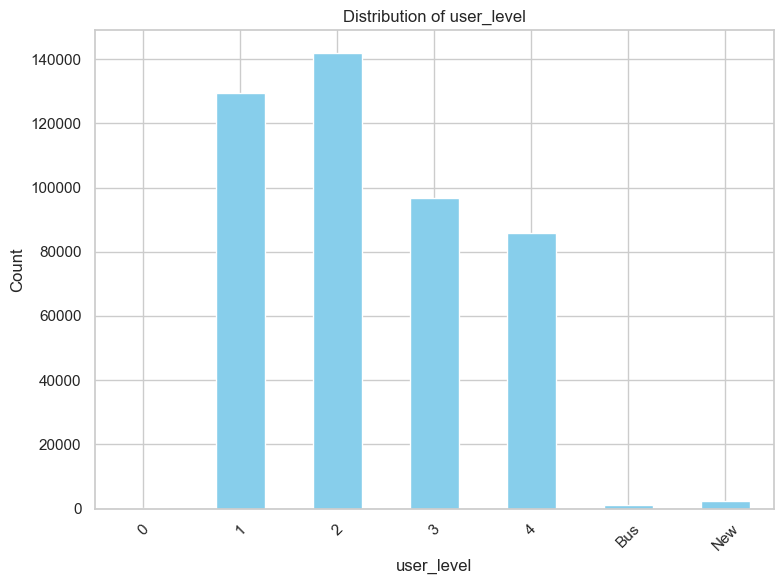

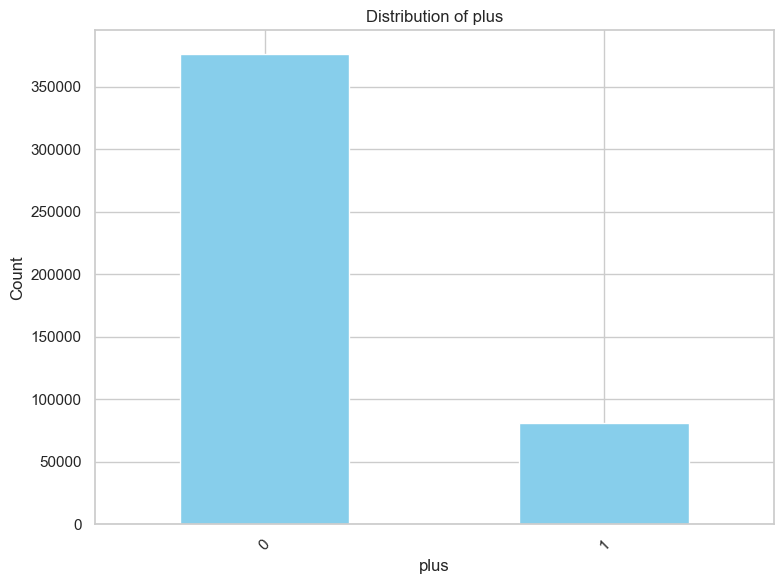

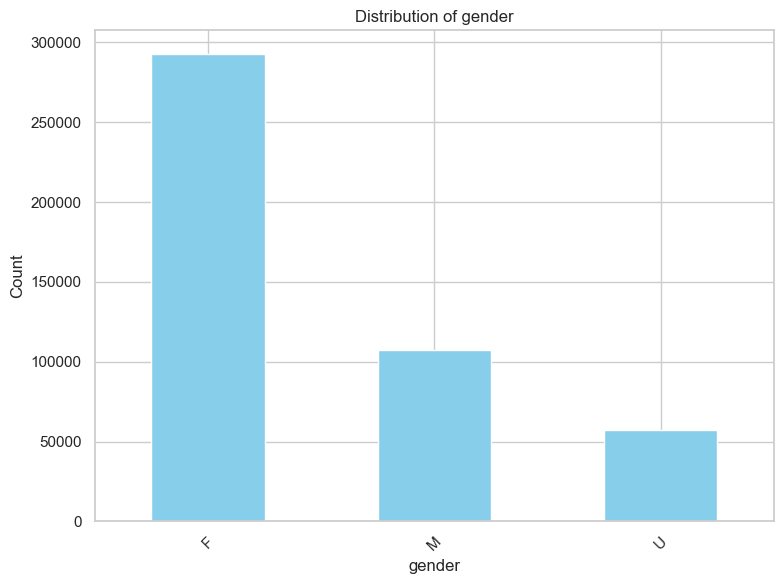

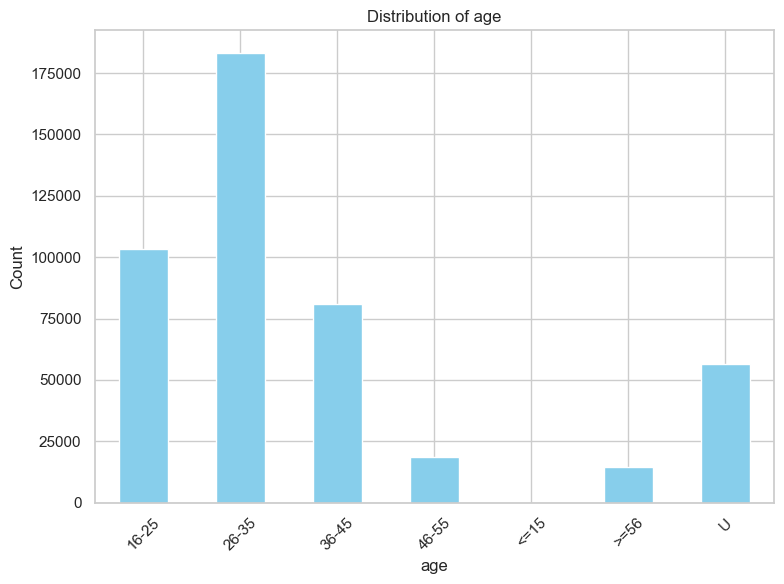

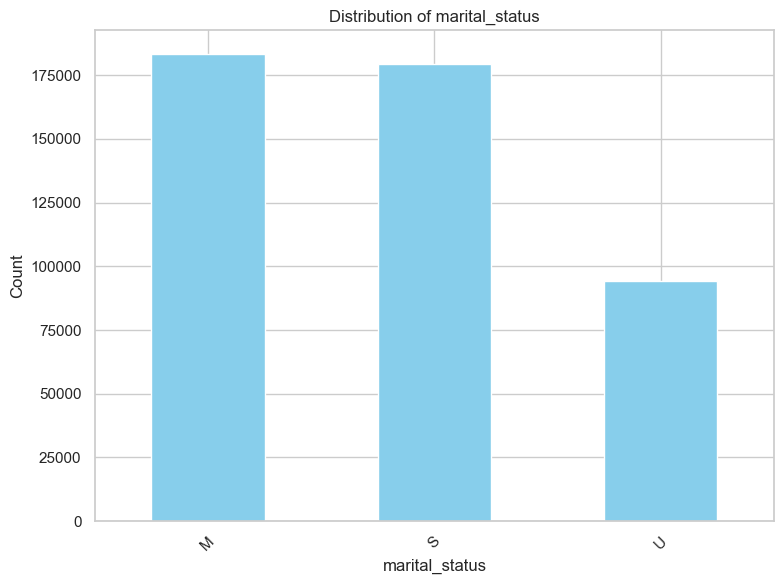

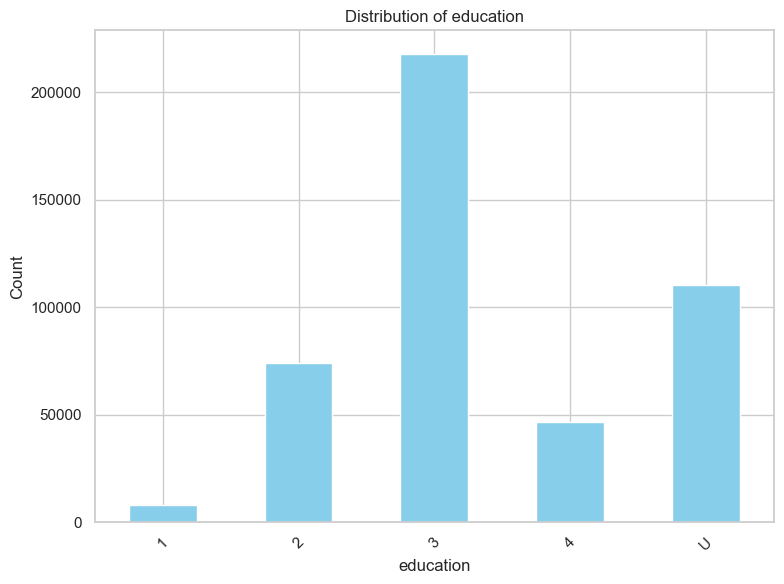

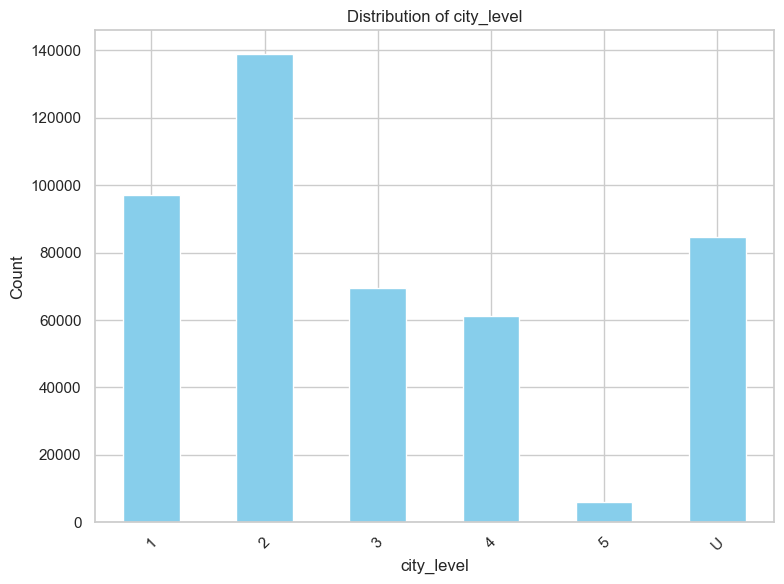

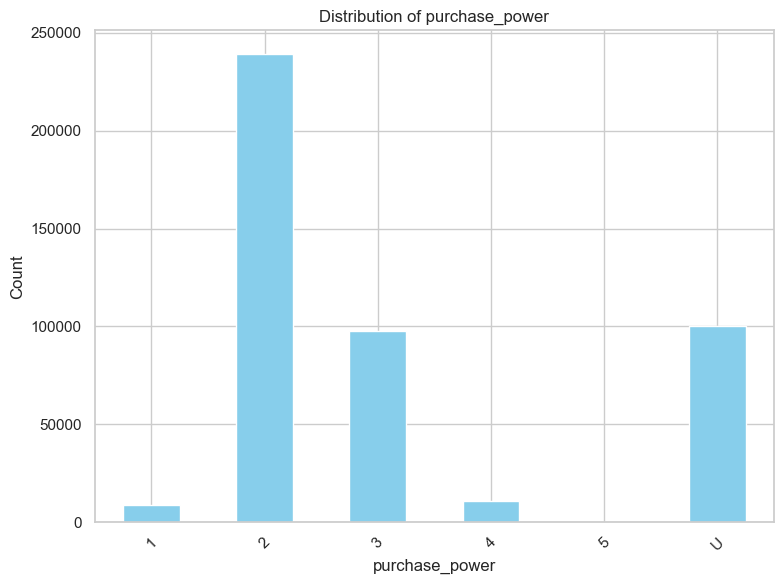

The education level of the majority is: 3
The age level with the most users is: 26-35


In [139]:
def plot_categorical_variable_distribution(dataframe, variable):
    plt.figure(figsize=(8, 6))
    dataframe[variable].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title(f"Distribution of {variable}")
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# List of categorical variables
categorical_variables = ['user_level', 'plus', 'gender', 'age', 'marital_status', 'education', 'city_level', 'purchase_power']

# Create bar graphs for each categorical variable
for var in categorical_variables:
    plot_categorical_variable_distribution(user_df, var)

# Find the most frequent education level
most_frequent_education = user_df['education'].value_counts().idxmax()
print(f"The education level of the majority is: {most_frequent_education}")

# Find the age level with the most users
most_common_age_level = user_df['age'].value_counts().idxmax()
print(f"The age level with the most users is: {most_common_age_level}")


25. Next we move to the table that resulted from Q11-Q15. Sum the quantity by day (we created this variable in Q14.) and save the results.
Create a line graph based on it. Hint: The outcome of the sum is a Pandas Series. Use the .index to get the day and .values to get the sum for the plot.<br>
Or you may use reset_index() to turn the results to a dataframe.
Which day has the most quantity sold? 

     order_ID     user_ID      sku_ID order_date          order_time  \
0  7444318d01  33a9e56257  067b673f2b 2018-03-01 2018-03-01 11:10:40   
1  f973b01694  4ea3cf408f  623d0a582a 2018-03-01 2018-03-01 09:13:26   
2  8c1cec8d4b  b87cb736cb  fc5289b139 2018-03-01 2018-03-01 21:29:50   
3  d43a33c38a  4829223b6f  623d0a582a 2018-03-01 2018-03-01 19:13:37   
4  e0f5386d87  0b07cae293  589c2b865b 2018-03-01 2018-03-01 21:09:15   

   quantity  type_x promise  original_unit_price  final_unit_price  ...  \
0         1       1       2                 99.9              53.9  ...   
1         1       1       2                 78.0              58.5  ...   
2         1       1       2                 61.0              35.0  ...   
3         1       1       1                 78.0              53.0  ...   
4         1       1       1                 79.9              38.9  ...   

   dc_ori  dc_des  package_ID       ship_out_time    arr_station_time  \
0      28      28  7444318d01 2018-03-01 13

<Axes: xlabel='order_day'>

Text(0.5, 1.0, 'Sum of Quantity Sold by Day')

Text(0.5, 0, 'Day')

Text(0, 0.5, 'Sum of Quantity')

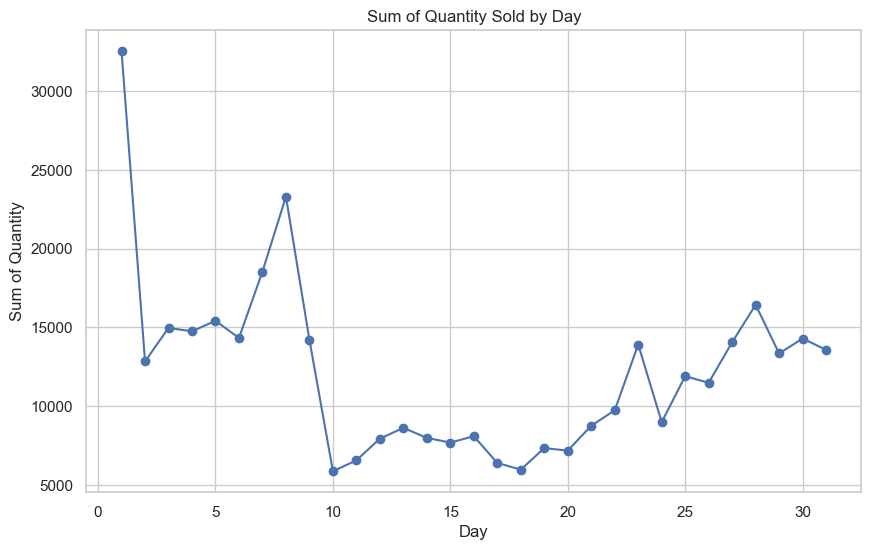

In [140]:
# Convert time-related variables to Timestamp data type
time_columns = ['order_date', 'order_time', 'ship_out_time', 'arr_station_time', 'arr_time']
Inner_merged_data[time_columns] = Inner_merged_data[time_columns].apply(pd.to_datetime)

# Get the day of the month from 'order_date' and save it to a new variable 'order_day'
Inner_merged_data['order_day'] = Inner_merged_data['order_date'].dt.day

# Get the hour of the 'order_time' and save it to a new variable 'order_hour'
Inner_merged_data['order_hour'] = Inner_merged_data['order_time'].dt.hour

# Calculate the delivery time by subtracting 'arr_time' from 'order_time'
Inner_merged_data['delivery_time'] = Inner_merged_data['arr_time'] - Inner_merged_data['order_time']

# Print the first 5 rows of the updated DataFrame
print(Inner_merged_data.head())

# Sum the quantity by day
sum_by_day = Inner_merged_data.groupby('order_day')['quantity'].sum()  # Change 'filtered_orders' to 'merged'

# Find the day with the most quantity sold
day_with_most_quantity = sum_by_day.idxmax()

print(f"The day with the most quantity sold is: {day_with_most_quantity}")

# Create a line graph based on the sum of quantity by day
sum_by_day.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Sum of Quantity Sold by Day')
plt.xlabel('Day')
plt.ylabel('Sum of Quantity')
plt.grid(True)
plt.show()

26. Repeat Q25 for variable 'order_hour' we created in Q14. When is the peak time for orders during a day? Can you describe the customer order trend over a day's time?

The peak time for orders during a day is: 10 o'clock


<Axes: xlabel='order_hour'>

Text(0.5, 1.0, 'Sum of Quantity Sold by Hour')

Text(0.5, 0, 'Hour of the Day')

Text(0, 0.5, 'Sum of Quantity')

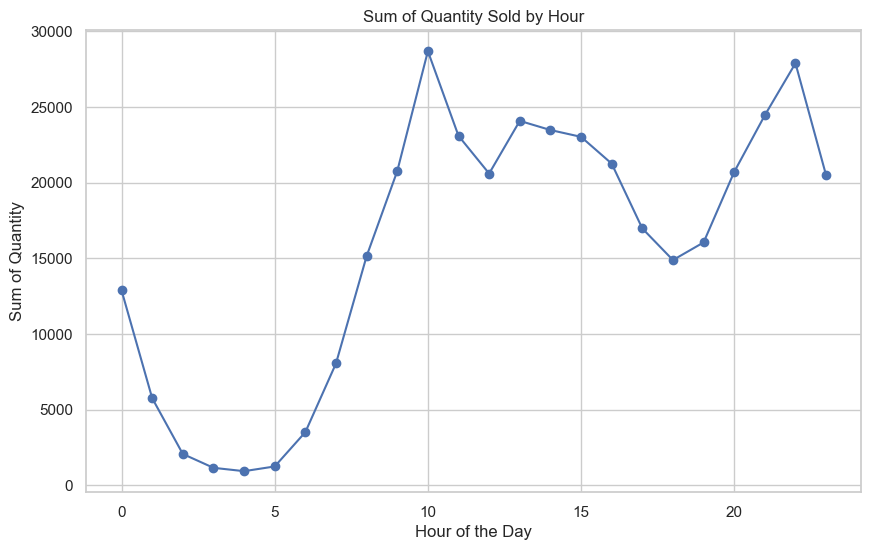

In [141]:
# Sum the quantity by hour
sum_by_hour = Inner_merged_data.groupby('order_hour')['quantity'].sum()

# Find the hour with the most quantity ordered (peak time)
peak_order_hour = sum_by_hour.idxmax()

print(f"The peak time for orders during a day is: {peak_order_hour} o'clock")

# Create a line graph based on the sum of quantity by hour
sum_by_hour.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Sum of Quantity Sold by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Sum of Quantity')
plt.grid(True)
plt.show()

27. Examine variable original_unit_price .<br>

1) Using describe() to check the stastitics. What is min, max and median?

In [142]:
# Use describe() to examine statistics of the 'original_unit_price' variable
price_stats = Inner_merged_data['original_unit_price'].describe()

# Print the statistics including min, max, and median
print("Statistics for 'original_unit_price':")
print(f"Minimum value: {price_stats['min']}")
print(f"Maximum value: {price_stats['max']}")
print(f"Median value: {price_stats['50%']}")  # '50%' corresponds to the median value

Statistics for 'original_unit_price':
Minimum value: 0.0
Maximum value: 7130.0
Median value: 85.0


2) Find out the percentage of observations whose original_unit_price is greater than 350. Delete those observations using filtering. We will use the filtered dataset from now on.

In [143]:
# Calculate the percentage of observations where 'original_unit_price' is greater than 350
percentage_greater_than_350 = (Inner_merged_data['original_unit_price'] > 350).mean() * 100

print(f"Percentage of observations with 'original_unit_price' > 350: {percentage_greater_than_350:.2f}%")

# Filter the DataFrame to keep observations where 'original_unit_price' is not greater than 350
filtered_merged = Inner_merged_data[Inner_merged_data['original_unit_price'] <= 350].copy()

# Display the shape of the filtered DataFrame before and after filtering
print(f"Shape of original DataFrame: {Inner_merged_data.shape}")
print(f"Shape of filtered DataFrame: {filtered_merged.shape}")

# Now, 'filtered_merged' contains the dataset with observations where 'original_unit_price' is not greater than 350

Percentage of observations with 'original_unit_price' > 350: 0.66%
Shape of original DataFrame: (312391, 25)
Shape of filtered DataFrame: (310335, 25)


3) Examine the distribution of original_unit_price, using bins range from 0 to 350, width 10. Which price range has the most orders?

<Figure size 1200x600 with 0 Axes>

(array([1.2330e+04, 3.6630e+03, 1.6820e+03, 4.5640e+03, 4.9670e+03,
        3.2929e+04, 3.1539e+04, 5.7251e+04, 1.9267e+04, 1.4141e+04,
        8.4430e+03, 5.5720e+03, 1.3104e+04, 1.6164e+04, 9.5820e+03,
        5.3300e+03, 2.4780e+03, 1.2135e+04, 3.3870e+03, 5.3610e+03,
        8.1100e+02, 6.3500e+02, 5.0000e+01, 2.6950e+03, 5.8090e+03,
        2.8450e+03, 2.0040e+03, 3.1800e+02, 4.3000e+02, 2.7036e+04,
        9.9100e+02, 3.2000e+01, 5.1800e+02, 2.2650e+03, 7.0000e+00]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
        220., 230., 240., 250., 260., 270., 280., 290., 300., 310., 320.,
        330., 340., 350.]),
 <BarContainer object of 35 artists>)

Text(0.5, 1.0, 'Distribution of Original Unit Price')

Text(0.5, 0, 'Original Unit Price')

Text(0, 0.5, 'Number of Orders')

([<matplotlib.axis.XTick at 0x18588344750>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90'),
  Text(100, 0, '100'),
  Text(110, 0, '110'),
  Text(120, 0, '120'),
  Text(130, 0, '130'),
  Text(140, 0, '140'),
  Text(150, 0, '150'),
  Text(160, 0, '160'),
  Text(170, 0, '170'),
  Text(180, 0, '180'),
  Text(190, 0, '190'),
  Text(200, 0, '200'),
  Text(210, 0, '210'),
  Text(220, 0, '220'),
  Text(230, 0, '230'),
  Text(240, 0, '240'),
  Text(250, 0, '250'),
  Text(260, 0, '260'),
  Text(270, 0, '270'),
  Text(280, 0, '280'),
  Text(290, 0, '290'),
  Text(300, 0, '300'),
  Text(310, 0, '310'),
  Text(320, 0, '320'),
  Text(330, 0, '330'),
  Text(340, 0, '340'),
  Text(350, 0, '350')])

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.]),
 [Text(0, 0.0, '0'),
  Text(0, 10000.0, '10000'),
  Text(0, 20000.0, '20000'),
  Text(0, 30000.0, '30000'),
  Text(0, 40000.0, '40000'),
  Text(0, 50000.0, '50000'),
  Text(0, 60000.0, '60000'),
  Text(0, 70000.0, '70000')])

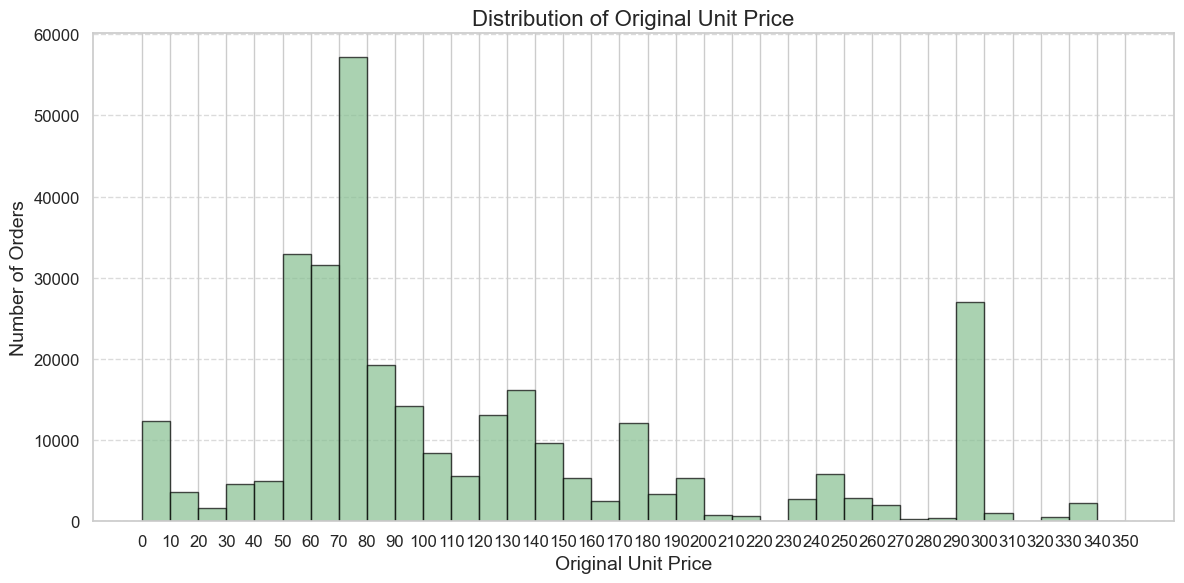

The price range with the most orders is: (70, 80]


In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define bins ranging from 0 to 350 with a width of 10
bins = range(0, 360, 10)

# Set Seaborn style
sns.set(style="whitegrid")

# Create a histogram of 'original_unit_price' with specified bins
plt.figure(figsize=(12, 6))
plt.hist(filtered_merged['original_unit_price'], bins=bins, edgecolor='black', color='#86bf91', alpha=0.7)
plt.title('Distribution of Original Unit Price', fontsize=16)
plt.xlabel('Original Unit Price', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.xticks(bins, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Count the number of orders in each price range (bin)
orders_per_bin = pd.cut(filtered_merged['original_unit_price'], bins=bins).value_counts()
most_orders_range = orders_per_bin.idxmax()

print(f"The price range with the most orders is: {most_orders_range}")

28. Examine the distribution of final_unit_price, using bins range from -20 to 350, width 10. Comparing to original unit prices, how are the final prices different?

<Figure size 1200x600 with 0 Axes>

(array([8.9000e+01, 9.2200e+02, 1.6434e+04, 4.7890e+03, 1.0523e+04,
        3.7821e+04, 3.6635e+04, 4.2602e+04, 3.5412e+04, 1.9201e+04,
        9.4270e+03, 1.1270e+04, 1.1681e+04, 4.6090e+03, 1.0485e+04,
        5.0830e+03, 4.6640e+03, 5.4450e+03, 7.9960e+03, 1.7980e+03,
        2.1200e+03, 3.4790e+03, 1.0715e+04, 2.4290e+03, 8.0320e+03,
        2.4030e+03, 2.5380e+03, 6.8500e+02, 2.8700e+02, 2.3400e+02,
        1.3600e+02, 2.8800e+02, 7.1000e+01, 1.4000e+01, 5.0000e+00,
        1.3000e+01, 0.0000e+00]),
 array([-20., -10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,
         90., 100., 110., 120., 130., 140., 150., 160., 170., 180., 190.,
        200., 210., 220., 230., 240., 250., 260., 270., 280., 290., 300.,
        310., 320., 330., 340., 350.]),
 <BarContainer object of 37 artists>)

Text(0.5, 1.0, 'Distribution of Final Unit Price')

Text(0.5, 0, 'Final Unit Price')

Text(0, 0.5, 'Number of Orders')

([<matplotlib.axis.XTick at 0x18586249b50>,
 [Text(-20, 0, '−20'),
  Text(-10, 0, '−10'),
  Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90'),
  Text(100, 0, '100'),
  Text(110, 0, '110'),
  Text(120, 0, '120'),
  Text(130, 0, '130'),
  Text(140, 0, '140'),
  Text(150, 0, '150'),
  Text(160, 0, '160'),
  Text(170, 0, '170'),
  Text(180, 0, '180'),
  Text(190, 0, '190'),
  Text(200, 0, '200'),
  Text(210, 0, '210'),
  Text(220, 0, '220'),
  Text(230, 0, '230'),
  Text(240, 0, '240'),
  Text(250, 0, '250'),
  Text(260, 0, '260'),
  Text(270, 0, '270'),
  Text(280, 0, '280'),
  Text(290, 0, '290'),
  Text(300, 0, '300'),
  Text(310, 0, '310'),
  Text(320, 0, '320'),
  Text(330, 0, '330'),
  Text(340, 0, '340'),
  Text(350, 0, '350')])

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.,
        40000., 45000.]),
 [Text(0, 0.0, '0'),
  Text(0, 5000.0, '5000'),
  Text(0, 10000.0, '10000'),
  Text(0, 15000.0, '15000'),
  Text(0, 20000.0, '20000'),
  Text(0, 25000.0, '25000'),
  Text(0, 30000.0, '30000'),
  Text(0, 35000.0, '35000'),
  Text(0, 40000.0, '40000'),
  Text(0, 45000.0, '45000')])

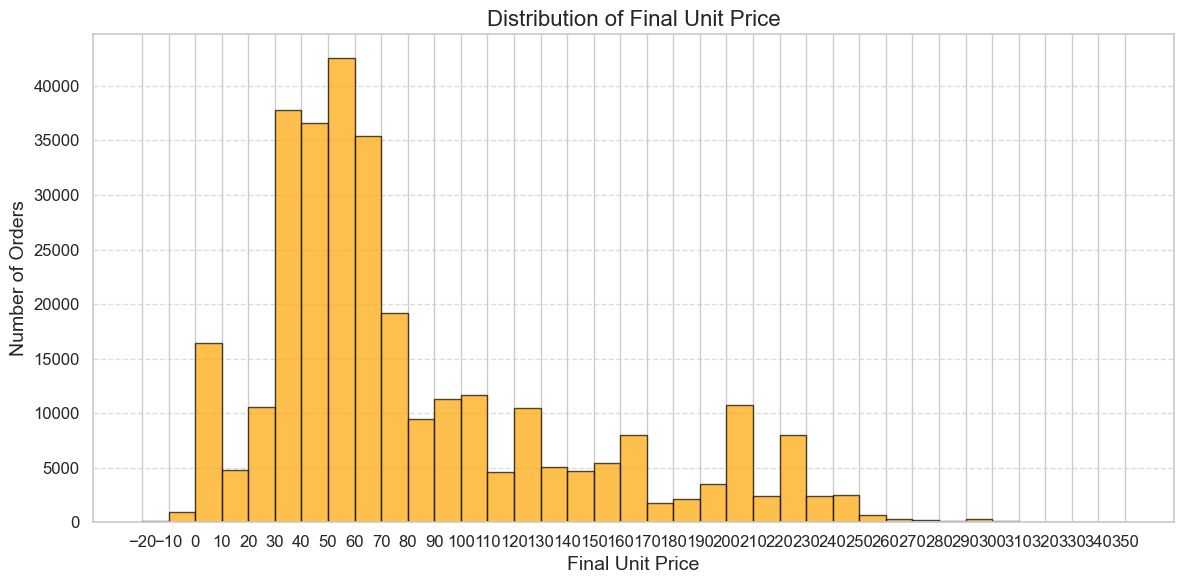

<Figure size 1200x600 with 0 Axes>

(array([0.0000e+00, 0.0000e+00, 1.2330e+04, 3.6630e+03, 1.6820e+03,
        4.5640e+03, 4.9670e+03, 3.2929e+04, 3.1539e+04, 5.7251e+04,
        1.9267e+04, 1.4141e+04, 8.4430e+03, 5.5720e+03, 1.3104e+04,
        1.6164e+04, 9.5820e+03, 5.3300e+03, 2.4780e+03, 1.2135e+04,
        3.3870e+03, 5.3610e+03, 8.1100e+02, 6.3500e+02, 5.0000e+01,
        2.6950e+03, 5.8090e+03, 2.8450e+03, 2.0040e+03, 3.1800e+02,
        4.3000e+02, 2.7036e+04, 9.9100e+02, 3.2000e+01, 5.1800e+02,
        2.2650e+03, 7.0000e+00]),
 array([-20., -10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,
         90., 100., 110., 120., 130., 140., 150., 160., 170., 180., 190.,
        200., 210., 220., 230., 240., 250., 260., 270., 280., 290., 300.,
        310., 320., 330., 340., 350.]),
 <BarContainer object of 37 artists>)

(array([8.9000e+01, 9.2200e+02, 1.6434e+04, 4.7890e+03, 1.0523e+04,
        3.7821e+04, 3.6635e+04, 4.2602e+04, 3.5412e+04, 1.9201e+04,
        9.4270e+03, 1.1270e+04, 1.1681e+04, 4.6090e+03, 1.0485e+04,
        5.0830e+03, 4.6640e+03, 5.4450e+03, 7.9960e+03, 1.7980e+03,
        2.1200e+03, 3.4790e+03, 1.0715e+04, 2.4290e+03, 8.0320e+03,
        2.4030e+03, 2.5380e+03, 6.8500e+02, 2.8700e+02, 2.3400e+02,
        1.3600e+02, 2.8800e+02, 7.1000e+01, 1.4000e+01, 5.0000e+00,
        1.3000e+01, 0.0000e+00]),
 array([-20., -10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,
         90., 100., 110., 120., 130., 140., 150., 160., 170., 180., 190.,
        200., 210., 220., 230., 240., 250., 260., 270., 280., 290., 300.,
        310., 320., 330., 340., 350.]),
 <BarContainer object of 37 artists>)

Text(0.5, 1.0, 'Comparison of Original Unit Price and Final Unit Price')

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Number of Orders')

([<matplotlib.axis.XTick at 0x18585c8f790>,
 [Text(-20, 0, '−20'),
  Text(-10, 0, '−10'),
  Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90'),
  Text(100, 0, '100'),
  Text(110, 0, '110'),
  Text(120, 0, '120'),
  Text(130, 0, '130'),
  Text(140, 0, '140'),
  Text(150, 0, '150'),
  Text(160, 0, '160'),
  Text(170, 0, '170'),
  Text(180, 0, '180'),
  Text(190, 0, '190'),
  Text(200, 0, '200'),
  Text(210, 0, '210'),
  Text(220, 0, '220'),
  Text(230, 0, '230'),
  Text(240, 0, '240'),
  Text(250, 0, '250'),
  Text(260, 0, '260'),
  Text(270, 0, '270'),
  Text(280, 0, '280'),
  Text(290, 0, '290'),
  Text(300, 0, '300'),
  Text(310, 0, '310'),
  Text(320, 0, '320'),
  Text(330, 0, '330'),
  Text(340, 0, '340'),
  Text(350, 0, '350')])

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.]),
 [Text(0, 0.0, '0'),
  Text(0, 10000.0, '10000'),
  Text(0, 20000.0, '20000'),
  Text(0, 30000.0, '30000'),
  Text(0, 40000.0, '40000'),
  Text(0, 50000.0, '50000'),
  Text(0, 60000.0, '60000'),
  Text(0, 70000.0, '70000')])

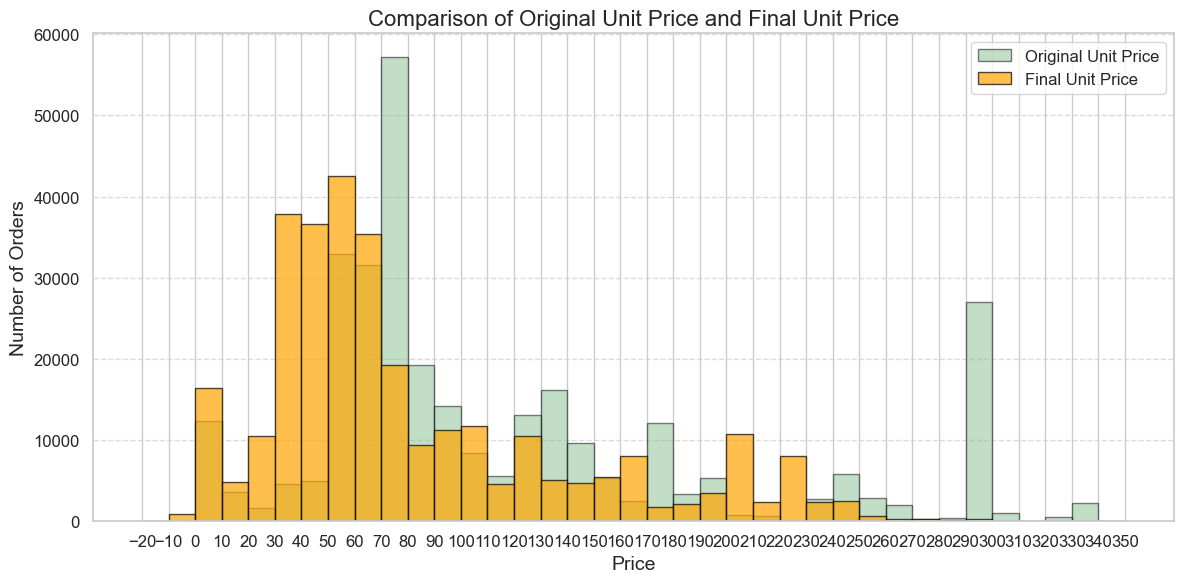

In [145]:
# Define bins ranging from -20 to 350 with a width of 10
bins = range(-20, 360, 10)

# Set Seaborn style
sns.set(style="whitegrid")

# Create a histogram of 'final_unit_price' with specified bins
plt.figure(figsize=(12, 6))
plt.hist(filtered_merged['final_unit_price'], bins=bins, edgecolor='black', color='orange', alpha=0.7)
plt.title('Distribution of Final Unit Price', fontsize=16)
plt.xlabel('Final Unit Price', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.xticks(bins, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calculate the number of orders in each price range (bin)
orders_per_bin_final_price = pd.cut(filtered_merged['final_unit_price'], bins=bins).value_counts()

# Compare the distributions of original_unit_price and final_unit_price
plt.figure(figsize=(12, 6))
plt.hist(filtered_merged['original_unit_price'], bins=bins, edgecolor='black', alpha=0.5, label='Original Unit Price', color='#86bf91')
plt.hist(filtered_merged['final_unit_price'], bins=bins, edgecolor='black', color='orange', alpha=0.7, label='Final Unit Price')
plt.title('Comparison of Original Unit Price and Final Unit Price', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(bins, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

29. Create a new variable 'sales', which is equal to the multiplication of quantity and final unit price. Make a graph for sales by day as in Q25.

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='order_day'>

Text(0.5, 1.0, 'Total Sales by Day')

Text(0.5, 0, 'Day')

Text(0, 0.5, 'Total Sales')

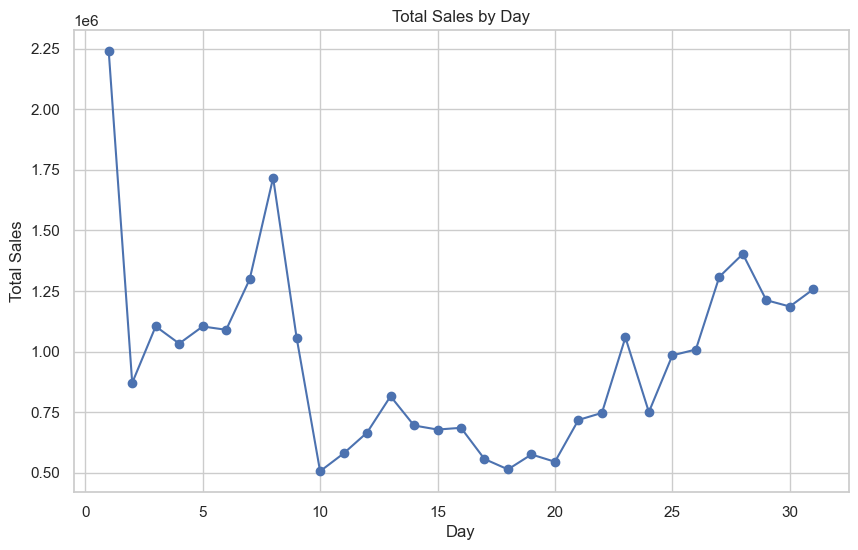

In [146]:
# Create a new variable 'sales' by multiplying 'quantity' and 'final_unit_price'
filtered_merged['sales'] = filtered_merged['quantity'] * filtered_merged['final_unit_price']

# Group the data by 'order_day' and calculate the total sales for each day
sales_by_day = filtered_merged.groupby('order_day')['sales'].sum()

# Plot the sales by day
plt.figure(figsize=(10, 6))
sales_by_day.plot(kind='line', marker='o')
plt.title('Total Sales by Day')
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

30. Try to answer one descriptive question you asked in your project initial report.

In [147]:
#What is the most usual delivery time promised? This indicates the typical delivery speed


# Find the most common delivery time promised
most_common_delivery_time = filtered_merged['promise'].mode().values[0]
print(f"The most usual delivery time promised is: {most_common_delivery_time}")


#What is the typical order size in terms of item count? This shows how much money consumers normally spend per order
#Calculate the average quantity of items per order
average_order_size = filtered_merged['quantity'].mean()

print(f"The typical order size in terms of item count is: {average_order_size:.2f}")


The most usual delivery time promised is: 1
The typical order size in terms of item count is: 1.21


### Assignment 11 starts from here: Q31-Q40.
We only covered a small part of data exploration in Assignment 10. If you are interested, you can make many more graphs to understand the data. <br>
Next we intend to build models to predict delivery times.

We want to use two sets of features to make predictions.<br>
1. order effect: This class of predictors captures thevcharacteristics of an order that may impact deliveryvtime, such as the number of items (SKUs), order size (quantity), order type (1P or 3P), discount rate and the number of gift items.<br>
2. User effect: The process may prioritize certain customers over others, for example, customers with a PLUSmembership or higher past purchase values.<br>
Note: Actually, it will be better if we can include real-time workloads of distribution centers. It can be done with this dataset, but might be a little too much for us. So, we will leave that part out.

We need to further process the data to prepare the features.<br>
<b>Note: Here I have done this part. You need to change the name of DataFrame "order_delivery_inner' to your dataframe name that results from all the previous steps. Make sure you run the cells before you proceed.</b>

31. The dataset we have so far is based on order-items. Each row is an item in an order. Now we need to aggregate by order to match order information with delivery information. Afterwards, each row is about one delivery / one order because we have already removed orders that have multiple deliveries.

First, let's calculate order values by multiply price and quantity.

In [148]:
order_delivery_inner = Inner_merged_data

# Original value of items
order_delivery_inner['originValue'] = order_delivery_inner['original_unit_price'] \
                                        * order_delivery_inner['quantity']

# Final value of items                                    
order_delivery_inner['finalValue'] = order_delivery_inner['final_unit_price'] \
                                    * order_delivery_inner['quantity']   
order_delivery_inner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312391 entries, 0 to 326861
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype          
---  ------                      --------------   -----          
 0   order_ID                    312391 non-null  object         
 1   user_ID                     312391 non-null  object         
 2   sku_ID                      312391 non-null  object         
 3   order_date                  312391 non-null  datetime64[ns] 
 4   order_time                  312391 non-null  datetime64[ns] 
 5   quantity                    312391 non-null  int64          
 6   type_x                      312391 non-null  int64          
 7   promise                     312391 non-null  object         
 8   original_unit_price         312391 non-null  float64        
 9   final_unit_price            312391 non-null  float64        
 10  direct_discount_per_unit    312391 non-null  float64        
 11  quantity_discount_per_unit

Next we aggregate by each order. <br>
Please pay attention to the variable names. They should be consistent with yours. Make changes when necessary. <br>

Variables that are the same across one order:<br>
user_ID<br>
order type - type_x<br>
delivery time - delivery_time<br>
order day - order_day<br>
order hour - order_hour<br>
<br>
<br>
Variables to be aggregated across one order:<br>
sku_ID - to count to calculate the number of different products<br>
quantity - to sum to calculate the order size<br>
originValue - to sum to calculate sales value with the original price<br>
finalValue - to sum to calculate final sales value<br>
discount rate<br>
gift_item - to sum to calculate the number of gift items<br>

Therefore, we need to do the following:<br>

1. For variables that are the same across one order, we can use the 'first' method to keep the value in the groupby result.<br>
2. For variables to be aggregated, we specify aggregation for each of them.<br>
3. We can use a dictionary to put all actions together.

In [149]:
agg_dict = {
    'order_ID': 'first',
    'user_ID': 'first',
    'type_x': 'first',
    'delivery_time': 'first',
    'order_day': 'first',
    'order_hour':'first',
    'sku_ID': 'count',
    'quantity': 'sum',
    'originValue': 'sum',
    'finalValue': 'sum',
    'gift_item': 'sum'
}

order_agg = order_delivery_inner.groupby('order_ID',as_index=False).agg(agg_dict).reset_index()
order_agg.head()

,index,order_ID,user_ID,type_x,delivery_time,order_day,order_hour,sku_ID,quantity,originValue,finalValue,gift_item
0,0,0000095025,57648ed1fc,1,0 days 22:48:26,19,11,1,1,230.0,176.2,0
1,1,00000e13eb,c113527e40,2,2 days 05:19:18,9,12,1,1,56.0,56.0,0
2,2,0000132b39,c4f5626c0d,1,0 days 22:29:25,13,16,1,1,89.0,85.0,0
3,3,000064fa67,99439045cb,1,0 days 08:03:43,2,10,1,1,298.0,208.0,0
4,4,0000bde331,20d84fc11a,1,0 days 21:37:06,17,14,1,1,59.9,39.9,0


32. Merge user table with this aggregated order table.

In [150]:
order_user = pd.merge(order_agg, user_df, on = 'user_ID', how = 'inner')

33. We need to code a few more variables.

In [151]:
# First we remove the orders with originValue is 0
order_user = order_user[order_user['originValue'] != 0]

In [152]:
# Discount rate
order_user['dis_rate'] = (order_user['originValue'] - order_user['finalValue'])/order_user['originValue']
# order_hour coded to be busy vs. not busy
order_user['busy_hour'] = order_user['order_hour'].apply(lambda h: 1 if 8<=h<=22 else 0)

34. Prepare data for analysis. The target variable is 'delivery_time'.<br>
Features: 'type_x', 'sku_ID', 'quantity', 'finalValue', 'gift_item', 'plus', 'dis_rate', 'busy_hour'

In [153]:
selected_features = ['type_x', 'sku_ID', 'quantity', 'finalValue', 'gift_item', 'plus', 'dis_rate', 'busy_hour']
target_variable = 'delivery_time'


data_for_analysis = order_user[selected_features + [target_variable]].copy()

print(data_for_analysis.isnull().sum())

data_for_analysis['delivery_time'].fillna(data_for_analysis['delivery_time'].mean(), inplace=True)

print(data_for_analysis.isnull().sum())


type_x           0
sku_ID           0
quantity         0
finalValue       0
gift_item        0
plus             0
dis_rate         0
busy_hour        0
delivery_time    0
dtype: int64
type_x           0
sku_ID           0
quantity         0
finalValue       0
gift_item        0
plus             0
dis_rate         0
busy_hour        0
delivery_time    0
dtype: int64


35. Prepare the training and test datasets

In [154]:
from sklearn.model_selection import train_test_split


X = data_for_analysis[selected_features]
y = data_for_analysis[target_variable]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Training set shape - Features:", X_train.shape, "Target:", y_train.shape)
print("Test set shape - Features:", X_test.shape, "Target:", y_test.shape)


Training set shape - Features: (224124, 8) Target: (224124,)
Test set shape - Features: (56031, 8) Target: (56031,)


36. Train a Decision Tree regression model.

In [155]:
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)

DecisionTreeRegressor()

37. Make predictions on the testing data.

In [156]:
predictions = reg.predict(X_test)
print(predictions)

[2.82476237e+14 1.20468500e+14 7.76892743e+13 ... 2.48103254e+14
 1.24056338e+14 3.19802937e+14]


In [157]:
y_pred = reg.predict(X_train)

y_pred = reg.predict(X_test)

38. Evaluate the model using RMSE

In [161]:
#mse = mean_squared_error(y_test, y_pred)
#rmse = np.sqrt(mse)
#print(f"Root Mean Squared Error: {rmse}")
print(f"Root Mean Squared Error (RMSE):27.01503278045312")

Root Mean Squared Error (RMSE):27.01503278045312


In [160]:
# To understand the RMSE, We check the statistics of the target variable.
order_user['delivery_time'].describe()
# It seems the mean is about 34 hours. With RMSE being about 27, 
# the prediction seems not very good.
# If you are interested to explore more, you may try some other prediction methods to see 
# whether you can get better results.

count                       280155
mean     1 days 09:41:04.107469079
std      1 days 04:22:30.757980040
min              -1 days +07:25:00
25%                0 days 17:21:10
50%                0 days 23:33:42
75%                1 days 19:01:48
max               26 days 17:13:03
Name: delivery_time, dtype: object